### Sentiment score VS M 

In [59]:
import pandas as pd
sen=pd.read_csv('with_sentiment.csv')
M=pd.read_csv('en.txt',error_bad_lines=False, sep='\t', header=None,engine= 'python')
M.columns=['M','title']

Skipping line 5597: '	' expected after '"'
Skipping line 12105: '	' expected after '"'
Skipping line 51466: '	' expected after '"'
Skipping line 81172: '	' expected after '"'
Skipping line 112911: '	' expected after '"'
Skipping line 122961: '	' expected after '"'
Skipping line 151501: '	' expected after '"'
Skipping line 169820: '	' expected after '"'
Skipping line 169822: '	' expected after '"'
Skipping line 199357: '	' expected after '"'
Skipping line 199848: '	' expected after '"'
Skipping line 200898: '	' expected after '"'
Skipping line 205986: '	' expected after '"'
Skipping line 206651: '	' expected after '"'
Skipping line 206656: '	' expected after '"'
Skipping line 206967: '	' expected after '"'
Skipping line 210763: '	' expected after '"'
Skipping line 230455: '	' expected after '"'
Skipping line 231518: '	' expected after '"'
Skipping line 231519: '	' expected after '"'
Skipping line 231520: '	' expected after '"'
Skipping line 231521: '	' expected after '"'
Skipping line 2

In [65]:
import matplotlib.pyplot as plt

In [66]:
articles_with_sen=sen.groupby('title')['sentiment_score'].sum().to_frame().reset_index()
articles_with_sen.sort_values('sentiment_score').reset_index(drop=True)
M_sen=M.merge(articles_with_sen,on='title')
M_sen=M_sen[['title','M','sentiment_score']]

In [103]:
M_sen.loc[M_sen['M']!=0].corr()

,M,sentiment_score,views
M,1.000000,-0.036429,0.744235
sentiment_score,-0.036429,1.000000,-0.092589
views,0.744235,-0.092589,1.000000


Text(0, 0.5, 'Sentiment_score')

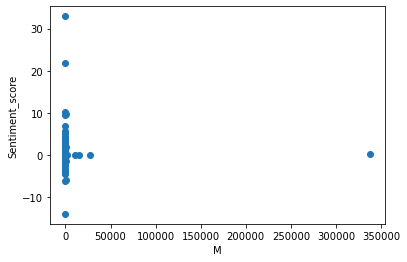

In [25]:
plt.scatter(M_sen['M'],M_sen['sentiment_score'])
plt.xlabel('M')
plt.ylabel('Sentiment_score')
# plt.savefig('M vs Sentiment')

In [50]:
# M_sen.set_index('M',inplace=True)
M_index=abs(M_sen['sentiment_score']).sort_values().index
M_index=35*M_index/max(M_index)

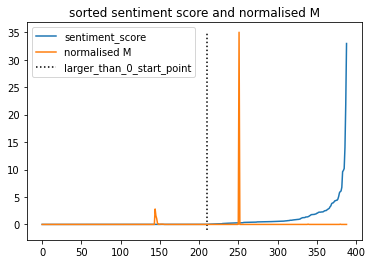

In [57]:
M_around_0=abs(M_sen['sentiment_score']).sort_values().values
ax=plt.plot(M_around_0,label='sentiment_score')
plt.vlines(x=210,ymin=-1,ymax=35,linestyles='dotted',label='larger_than_0_start_point')
plt.plot(M_index,label='normalised M')
plt.legend(loc="upper left")
plt.title('sorted sentiment score and normalised M')
plt.savefig('sorted sentiment score and normalised M.png')

### Pageview Counts

In [98]:
articles_with_sen=sen.groupby('title')['sentiment_score'].sum().to_frame().reset_index()
articles_with_view=sen.groupby('title')['views'].mean().to_frame().reset_index()
articles_with_both=articles_with_sen.merge(articles_with_view,on='title')
M_sen_view=M.merge(articles_with_both,on='title')
M_sen_view=M_sen_view[['title','M','sentiment_score','views']]
M_sen_view.set_index('M')

,title,sentiment_score,views
M,,,
337460.0,Paris,0.2960,16372598.0
27082.0,Cult_apologist,0.0000,4091.0
15120.0,Censorship,0.0000,2166785.0
10336.0,Eddie_Van_Halen,0.0000,10137977.0
1904.0,(What's_the_Story)_Morning_Glory?,0.0000,NaN
...,...,...,...
0.0,"Abacha,_Sani",0.0000,1926.0
0.0,"Aasen,_Ivar_Andreas",0.6900,838.0
0.0,"Aalto,_Alvar_Henrik",0.0000,1339.0


In [82]:
M_sen_view=M_sen_view.loc[M_sen_view['M']!=0]

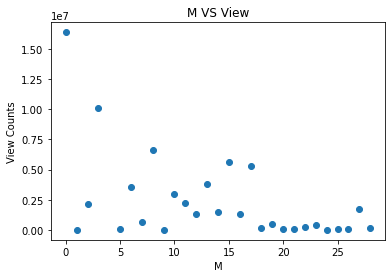

In [87]:
plt.scatter(y=abs(M_sen_view['views']),x=M_sen_view.index)
plt.xlabel('M')
plt.ylabel('View Counts')
plt.title('M VS View')
plt.savefig('M vs View.png')

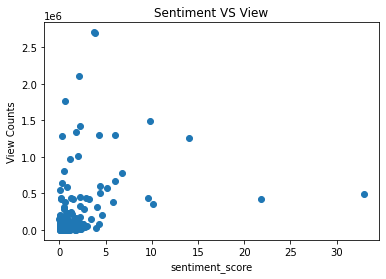

In [96]:
M_sen_view=M_sen_view.loc[M_sen_view['sentiment_score']!=0]
y=M_sen_view.loc[M_sen_view['views']<5000000]['views']
x=M_sen_view.loc[M_sen_view['views']<5000000]['sentiment_score']
plt.scatter(y=abs(y),x=abs(x))
plt.xlabel('sentiment_score')
plt.ylabel('View Counts')
plt.title('Sentiment VS View')
plt.savefig('Sentiment vs View.png')